# 使用PyTorch定义网络模型，对随机生成的200个二分类样本进行学习和预测
## 1 导包准备数据

In [1]:
from sklearn.datasets import make_moons
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 使用make_moon内置生成模型，随机产生二分类数据，200个样本
np.random.seed(33)
X, y = make_moons(200, noise=0.2)
print(X)
print(y)

[[ 0.435018    0.30610664]
 [ 1.43945224 -0.09135623]
 [ 0.06755957  0.67312595]
 [ 0.31212183  0.05179172]
 [-0.09762979 -0.0955339 ]
 [ 1.27813538 -0.71572837]
 [ 0.12245535  1.0587108 ]
 [ 0.47114767  0.69480988]
 [-0.04620811  0.12777177]
 [-0.13416591  0.26590921]
 [-0.20733425 -0.12160184]
 [ 0.80424597 -0.11893613]
 [ 0.23817489 -0.22988587]
 [ 0.28640076  0.98905328]
 [ 0.32839983  0.44072682]
 [ 1.32090709 -0.88671682]
 [-1.03704101  0.61791898]
 [ 0.39073766 -0.32451606]
 [ 1.67890755  0.42637495]
 [-0.78725591  0.40904886]
 [ 1.96577789  0.61548428]
 [ 1.33739934 -0.47522962]
 [-0.00499648  1.14205822]
 [-0.87928471  1.26108455]
 [-1.22468754  0.18177208]
 [ 0.59113289  0.84819287]
 [ 1.36536059 -0.07863534]
 [ 0.91342347  0.57793407]
 [-0.84662737  0.49496337]
 [ 1.67868042 -0.26382089]
 [ 1.94760477  0.52176962]
 [ 1.96962082 -0.37169676]
 [ 0.88990353 -0.49863825]
 [ 0.23022009 -0.58860587]
 [-1.14885946  0.51640428]
 [-0.85127032  0.9914816 ]
 [-0.83411534  0.48692421]
 

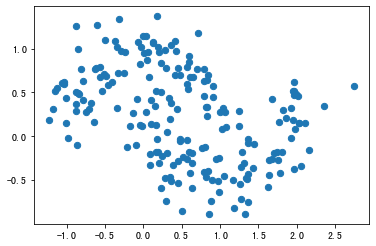

In [5]:
#cm = plt.cm.get_cmap('RdYlBu')
#plt.scatter(X[:, 0], X[:, 1], s=40, cmap=cm)
plt.scatter(X[:, 0], X[:, 1], s=40)
plt.show()

In [8]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

## 2 模型
### 2.1 使用PyTorch定义网络模型

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 定义第一个FC层
        self.fc1 = nn.Linear(2, 100)
        # 定义第二个FC层
        self.fc2 = nn.Linear(100, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        ans = []
        for t in pred:
            if t[0] > t[1]:
                ans.append(0)
            else:
                ans.append(1)
                
        return torch.tensor(ans)

### 2.2 初始化模型

In [17]:
model = Net()

## 3 定义评估标准

In [18]:
criterion = nn.CrossEntropyLoss()

## 4 定义优化器

In [19]:
print(f'\nParameters:{np.sum([param.numel() for param in model.parameters()])}')


Parameters:502


In [20]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## 5 训练

In [22]:
epochs = 1000
losses = []
for i in range(epochs):
    # 对输入的X进行预测
    y_pred = model.forward(X)
    # 得到损失
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    # 清空之前的梯度
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 调整权重
    optimizer.step()

## 6 预测

In [23]:
from sklearn.metrics import accuracy_score
print(model.predict(X))

tensor([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0])


/Users/fenghaoguo/opt/anaconda3/envs/p39/lib/python3.9/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [24]:
print(accuracy_score(model.predict(X), y))

0.99


/Users/fenghaoguo/opt/anaconda3/envs/p39/lib/python3.9/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


## 7 绘制决策面

In [25]:
def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

In [29]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # 计算决策面
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # np.c_按行连接两个矩阵，就是把两个矩阵左右相加
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 绘制分类决策面
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    # 绘制样本点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
    plt.show()

/Users/fenghaoguo/opt/anaconda3/envs/p39/lib/python3.9/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


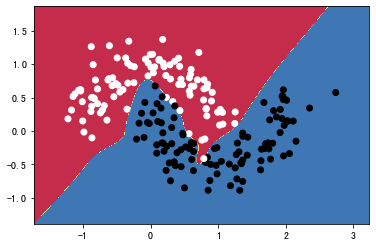

In [30]:
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())